In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

%matplotlib inline

from sklearn import datasets, linear_model

In [3]:
data = np.loadtxt('corolla',delimiter=',')

# X = data[:10,:2]
#corolla
y= data[:, 2]
X1 = data[:,:2]
X2 = data[:,3:]
X = np.column_stack((X1,X2))
#juke
#y= data[:, 2]
#X= data[:,:2]
X.shape, y.shape



((63, 3), (63,))

In [4]:
norm_y = (y - y.min())/(y.max()- y.min())

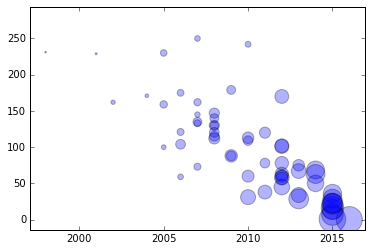

In [5]:
area = np.pi * (15 * norm_y)**2 

plt.scatter(X[:,0], X[:,1], s=area, c='b', alpha=0.3)
plt.autoscale(tight=True)
plt.show()

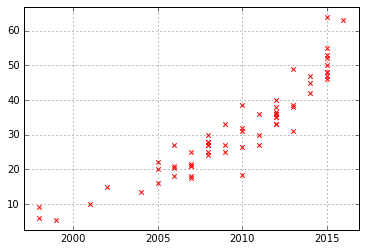

In [6]:
plt.scatter(X[:,0],y, marker='x',c='red')

plt.autoscale(tight=True)
plt.grid()
plt.show()

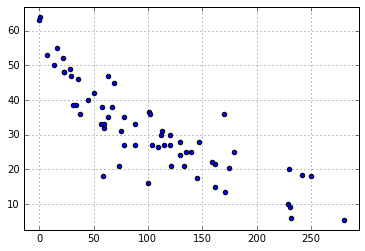

In [7]:
plt.scatter(X[:,1],y, marker='o',c='b')
plt.autoscale(tight=True)
plt.grid()
plt.show()

In [8]:
# Create linear regression object
regr = linear_model.LinearRegression()
degree_2rd = make_pipeline(PolynomialFeatures(2), Ridge())
degree_3rd = make_pipeline(PolynomialFeatures(3), Ridge())
degree_4rd = make_pipeline(PolynomialFeatures(4), Ridge())
degree_5rd = make_pipeline(PolynomialFeatures(5), Ridge())

In [9]:
# Train the model using the training sets
regr.fit(X,y)
degree_2rd.fit(X, y)
degree_3rd.fit(X, y)
degree_4rd.fit(X, y)
degree_5rd.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [10]:
milage = 36
s = np.array([[2015, milage, 1.6]])
#s = np.array([[2013, milage]])

print regr.predict(s)
print degree_2rd.predict(s)
print degree_3rd.predict(s)
print degree_4rd.predict(s)
print degree_5rd.predict(s)

[ 47.37232551]
[ 47.80697183]
[ 46.60433565]
[ 46.07370582]
[ 48.11956334]


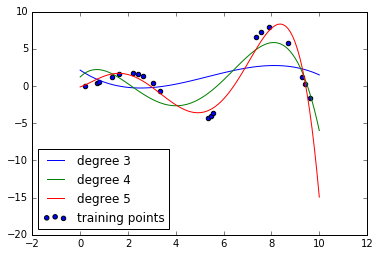

In [11]:
# Example found here
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html

def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

# plt.plot(x_plot, f(x_plot), label="ground truth")
plt.scatter(x, y, label="training points")

for degree in [3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()